<module 'matplotlib.pyplot' from 'c:\\python\\workspace\\pycharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

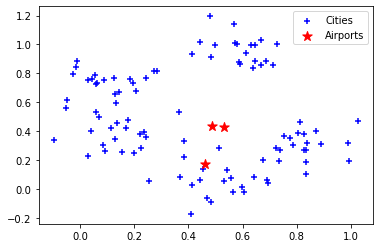

In [56]:
import random
import numpy as np
import math 

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [57]:
# Calculate the distance between two 2D points
def dist(p1, p2):
    # p1 and p2 are elements from an enumerate object [1][0] is an x value and [1][1] is a y value
    dist = math.sqrt((p2[1][0] - p1[1][0]) ** 2 + (p2[1][1] - p1[1][1]) ** 2)  
    return dist  

In [58]:
# The (x,y) coordinates of all cities are stored in the 'cities' variable as a list of tuples

closest_airports = {}
# Iterate over the inner loop for as many "airports" are available for "construction"
# i[0] returns the iteration index, i[1][0] returns the corresponding x and i[1][1] returns the corresponding y
for i in enumerate(airports):
    print(i)
    # Iterate through all cities and follow the inner iterative function
    # c[0] returns the iteration index, c[1][0] returns the corresponding x and c[1][1] returns the corresponding y
    # Find the closest airport to each city and store the result in a dictionary relative to the index of the city
    # i.e. c[0] = 6 then closest_airport = {6: (i, dist(c, i))}
    for c in enumerate(cities):
        distance = dist(c, i) # Save as variable to reduce calculations below
        # If this is not the first airport being checked
        if i[0] != 0:
            # If this airport has a lesser distance to the previous closer airport, update the closest airport
            if closest_airports[c[0]][1] > distance:
                print("New airport closer", closest_airports[c[0]][1], distance)
                closest_airports[c[0]] = (i[0], distance)
            
        # If comparing distance between cities to first airport, set closest airport equal to first airport since there
        # are no other known airports yet.
        else:
            closest_airports[c[0]] = (i[0], distance)
            
            
        print(c[1][0], c[1][1])
        
    print('\n\n\n\n\n')
print(closest_airports)

(0, (0.4627650296958675, 0.16853828290695283))
0.9878045820159925 0.3178537276308211
0.8039778122803736 0.3835563597647331
0.5963357191237636 0.01424209609307689
0.3651359859779596 0.535353888558811
0.24484914238213992 0.7676729714182798
0.8252082297646334 0.2669168312787225
0.2558170142639041 0.05480315855319476
0.4550194001695227 0.1402108536106113
0.36859770538970515 0.08023282376427572
0.6401134182519188 0.0851268733563457
-0.027359595581866944 0.7941790793666291
0.12995031338450305 0.34156615633259246
0.833777380582683 0.10300358207980187
0.1689064315135608 0.4189787012109838
0.8114303875786042 0.4641241759764916
0.2449880377333017 0.36082463922360664
0.27185413910469647 0.8171735451998116
0.6444303775604051 0.8827699985144293
0.44289488324698234 0.05763599315143364
0.17544082952227497 0.47685661977536087
0.08835569868638421 0.7510829695805504
0.5898690250104398 0.8660781467837573
0.646451432404254 0.9965093556355883
0.058481750962905144 0.7243201346185495
0.03974927180910648 0.40